# Plotting

We will plot with 3 datasets this week. Let's load them. 

In [9]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as pdr  # IF NECESSARY, from terminal: pip install pandas_datareader
import seaborn as sns
from numpy.random import default_rng

# these three are used to open the CCM dataset:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen

pd.set_option("display.max_rows", 10)  # display option for pandas
# more here: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

## Load macro_data

In [10]:
# LOAD DATA AND CONVERT TO ANNUAL

start = 1990 # pandas datareader can infer these are years
end = 2018
macro_data = pdr.data.DataReader(['CAUR','MIUR','PAUR', # unemployment 
                                  'LXXRSA','DEXRSA','WDXRSA', # case shiller index in LA, Detroit, DC (no PA  available!)
                                  'MEHOINUSCAA672N','MEHOINUSMIA672N','MEHOINUSPAA672N'], #  
                                 'fred', start, end)
macro_data = macro_data.resample('Y').first() # get's the first observation for each variable in a given year

# CLEAN UP THE FORMATING SOMEWHAT

macro_data.index = macro_data.index.year
macro_data.columns=pd.MultiIndex.from_tuples([
    ('Unemployment','CA'),('Unemployment','MI'),('Unemployment','PA'),
    ('HouseIdx','CA'),('HouseIdx','MI'),('HouseIdx','PA'),
    ('MedIncome','CA'),('MedIncome','MI'),('MedIncome','PA')
    ])



In [11]:
year_state_tall = macro_data.stack().reset_index().rename(columns={'level_1':'state'}).sort_values(['state','DATE'])    

year_state_wide = macro_data
# one level names
year_state_wide.columns=[
    'Unemployment_CA','Unemployment_MI','Unemployment_PA',
    'HouseIdx_CA','HouseIdx_MI','HouseIdx_PA',
    'MedIncome_CA','MedIncome_MI','MedIncome_PA'
    ]

## And load CCM data

First, load the data

In [12]:
url = 'https://github.com/LeDataSciFi/ledatascifi-2024/blob/main/data/CCM_cleaned_for_class.zip?raw=true'

#firms = pd.read_stata(url)   
# <-- that code would work, but GH said it was too big and
# forced me to zip it, so here is the work around to download it:

with urlopen(url) as request:
    data = BytesIO(request.read())

with ZipFile(data) as archive:
    with archive.open(archive.namelist()[0]) as stata:
        ccm = pd.read_stata(stata)

## Sidebar: Here's a fun EDA hack:

https://ydata-profiling.ydata.ai/docs/master/index.html

Notes
- Slow with huge datasets (see webpage 
- Doesn't work with multiindex column names (must be "one level")

In [13]:
# install new package (run this one time only)
# !pip install -U ydata-profiling

# i got an error towards the end but it still installed...

In [14]:
# this package used to be called pandas-profiling
# new name, better performance (speed and features)
# from ydata_profiling import ProfileReport

# create the report:
# profile = ProfileReport(macro_data, title="Pandas Profiling Report")
# profile.to_file("macro_data_report.html")



From the `year_state` data (wide or tall):

_("unemployment changes": Focus on the change in the _level_ (raw difference, not percent change) of unemployment from one year compared the prior year.)_

- Q0. How has median income has evolved over time for PA?
    - Demos...
- Q1. How has *unemployment changes* evolved over time for PA?   
- Q2. What is the distribution of unemployment changes for all states (view as one var)?   
- Q3. What is the distribution of unemployment changes for all states (separately)?
- Q4. How does unemployment changes vary with median income growth?

From the `ccm` data:

- Q5. Plot the distribution of R&D (`xrd_a`). Bonuses:
    - deal with outliers
    - add a title
    - change the x and y axis titles
- Q6: Compare R&D and CAPX. Bonuses:
    - don't plot outliers
    - avoid oversaturated plot

In [15]:
year_state_tall # aka tidy data in the "R" world - a column is a variable, a row has a key uniquely IDing it

,DATE,state,Unemployment,HouseIdx,MedIncome
0,1990,CA,5.2,100.471193,68370.0
3,1991,CA,7.1,95.569015,66720.0
6,1992,CA,8.6,92.786926,67460.0
9,1993,CA,9.8,85.246295,64260.0
12,1994,CA,9.3,77.395052,65210.0
...,...,...,...,...,...
74,2014,PA,6.5,206.969969,66740.0
77,2015,PA,5.5,208.712061,73100.0
80,2016,PA,5.3,212.112667,73170.0
83,2017,PA,5.2,218.258179,72260.0


In [16]:
year_state_wide

,Unemployment_CA,Unemployment_MI,Unemployment_PA,HouseIdx_CA,HouseIdx_MI,HouseIdx_PA,MedIncome_CA,MedIncome_MI,MedIncome_PA
DATE,,,,,,,,,
1990,5.2,7.7,5.2,100.471193,NaN,93.362855,68370.0,61490.0,59570.0
1991,7.1,8.8,6.5,95.569015,58.420806,89.706871,66720.0,63650.0,60180.0
1992,8.6,9.5,7.4,92.786926,59.748947,88.573807,67460.0,62370.0,57760.0
1993,9.8,7.6,7.2,85.246295,61.564205,89.065118,64260.0,61600.0,58460.0
1994,9.3,7.2,6.7,77.395052,64.526663,88.988467,65210.0,65120.0,59190.0
...,...,...,...,...,...,...,...,...,...
2014,8.2,8.1,6.5,216.563799,95.261564,206.969969,73170.0,62910.0,66740.0
2015,6.8,6.0,5.5,228.257189,98.235532,208.712061,77030.0,65610.0,73100.0
2016,5.7,4.9,5.3,243.482835,104.900944,212.112667,79960.0,68500.0,73170.0


In [ ]:
# - Q0. How has median income has evolved over time for PA?
#     - Demos...

<Axes: xlabel='DATE'>

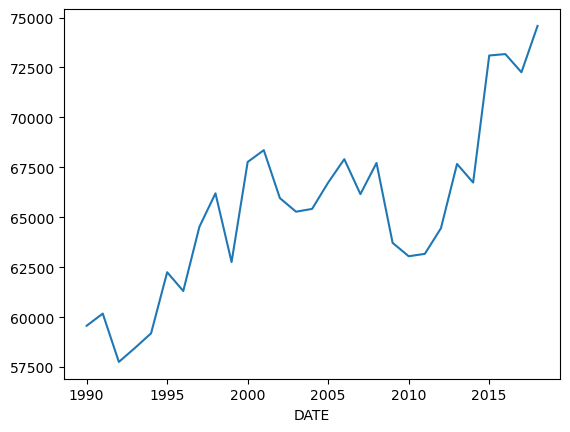

In [18]:
# from the WIDE, using pandas plot
year_state_wide['MedIncome_PA'].plot()

<Axes: xlabel='DATE'>

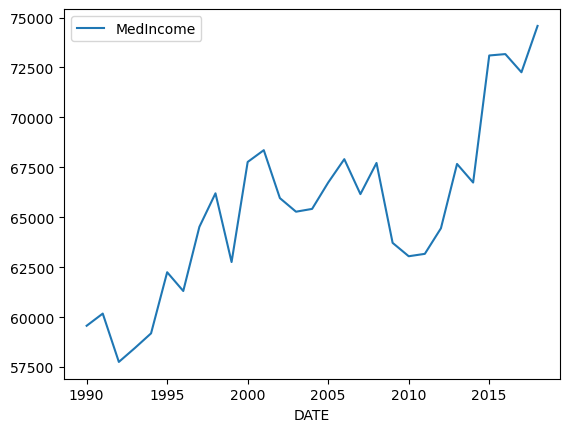

In [23]:
# from the tall, using pandas
med_income_pa = year_state_tall.query('state=="PA"')[['DATE','MedIncome']]

med_income_pa.set_index('DATE').plot()  


<Axes: xlabel='DATE'>

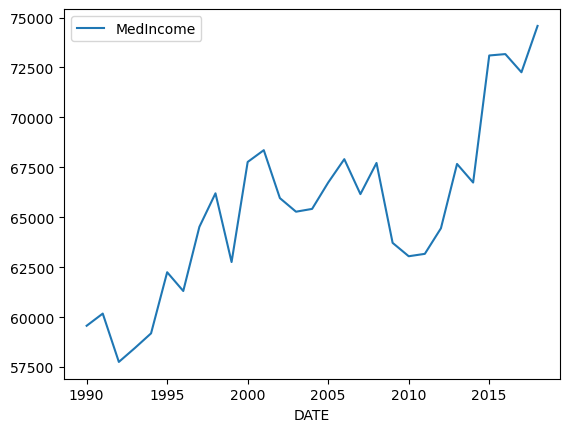

In [25]:
# from the tall, using pandas
year_state_tall.query('state=="PA"')[['DATE','MedIncome']].set_index('DATE').plot()  


C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Median Income in PA')

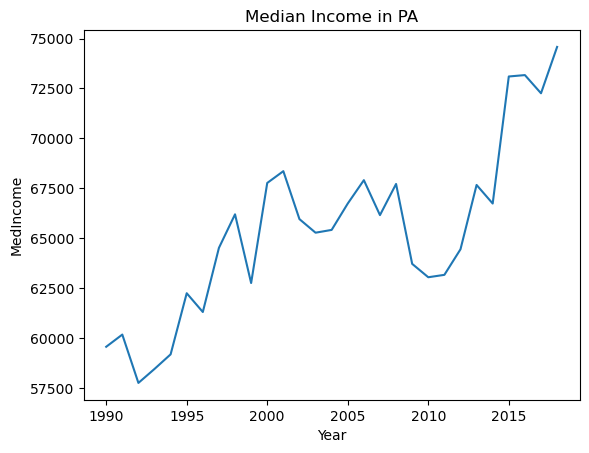

In [47]:
# from the tall, using seaborn

# plot median income for PA over time
sns.lineplot(data=year_state_tall.query('state=="PA"'), # you can query in the data arg 
             x='DATE', 
             y='MedIncome')

# one way to add labels and stuff - plt.thing('text')
plt.xlabel('Year')
plt.title('Median Income in PA')


C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DATE', ylabel='MedIncome'>

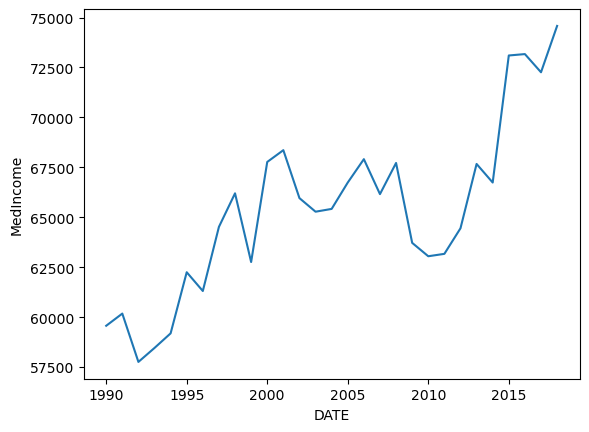

In [45]:
# tall with sns with alt query 
sns.lineplot(x='DATE',y='MedIncome',
             data=year_state_tall[ year_state_tall['state'].isin(['PA']) ] )

# year_state_tall['state'] == "PA"

C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DATE', ylabel='MedIncome'>

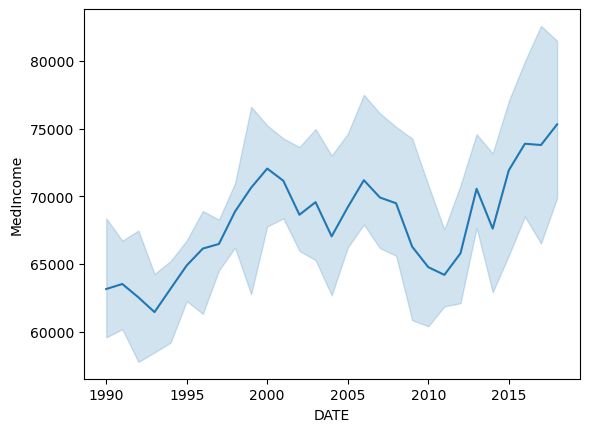

In [40]:
# by default, with tall and groups of obs, SNS will aggregate Y by X, and plot mean/error bars 
sns.lineplot(x='DATE',y='MedIncome',
             data=year_state_tall)


<Axes: xlabel='DATE'>

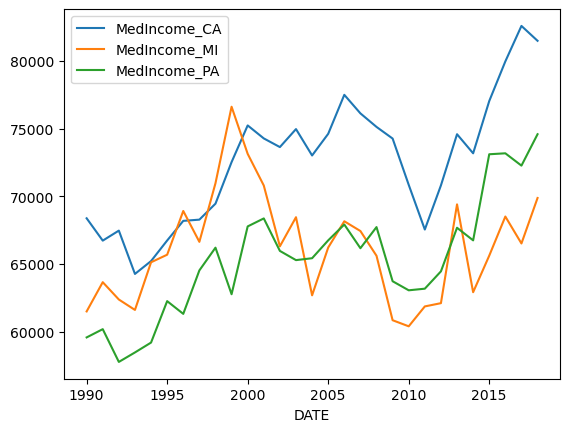

In [42]:
# pandas wide example by mason:
vars = ['MedIncome_CA','MedIncome_MI','MedIncome_PA']
year_state_wide[vars].plot()

C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DATE', ylabel='MedIncome'>

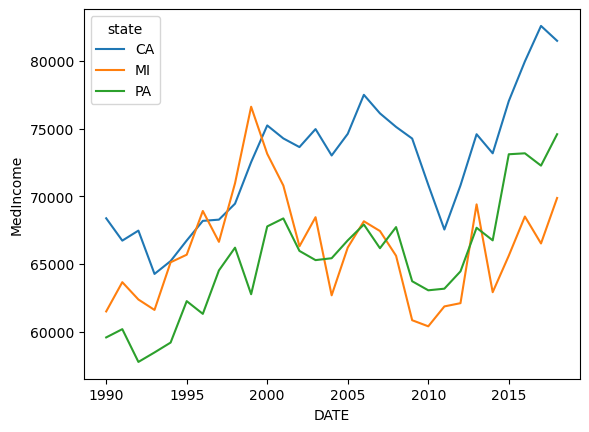

In [43]:
# from tall with seaborn, easy to replicate:
# hue controls grouping (row and col do too, but differently)_
sns.lineplot(x='DATE',y='MedIncome',
             data=year_state_tall, 
            hue='state')

# Q1 - WARNING/LESSON/ABCD

If you create a variable in a TALL dataset based on prior rows of data... groupby!

Else you propogate info from one state to next (one firm to next...)

In [63]:
# - Q1. How has *unemployment changes* evolved over time for PA?   
year_state_tall['diff'] = year_state_tall.groupby('state')['Unemployment'].diff()

# lets check!!!
# two options: iloc/list slice ;  or variable inspector
year_state_tall[25:35]

,DATE,state,Unemployment,HouseIdx,MedIncome,diff
75,2015,CA,6.8,228.257189,77030.0,-1.4
78,2016,CA,5.7,243.482835,79960.0,-1.1
81,2017,CA,5.2,256.243002,82580.0,-0.5
84,2018,CA,4.4,275.223511,81480.0,-0.8
1,1990,MI,7.7,NaN,61490.0,NaN
4,1991,MI,8.8,58.420806,63650.0,1.1
7,1992,MI,9.5,59.748947,62370.0,0.7
10,1993,MI,7.6,61.564205,61600.0,-1.9
13,1994,MI,7.2,64.526663,65120.0,-0.4
16,1995,MI,5.2,68.973289,65680.0,-2.0


C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DATE', ylabel='diff'>

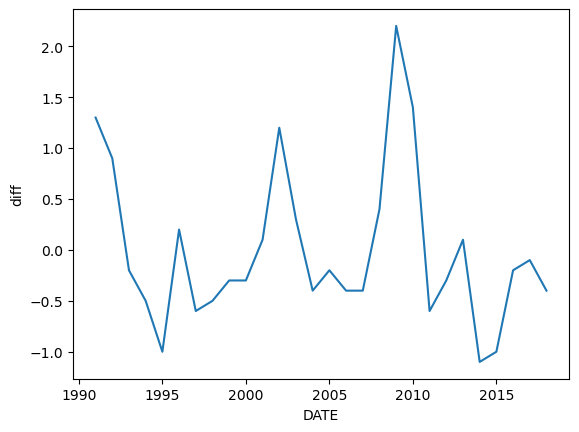

In [64]:
sns.lineplot(data=year_state_tall.query('state == "PA"' ),
             x = "DATE", 
             y = "diff")

C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


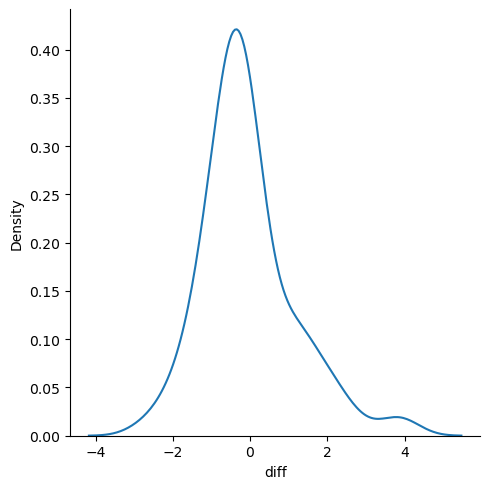

In [67]:
# - Q2. What is the distribution of unemployment changes for all states (view as one var)?   
# dist = kde, histo, boxplot
# sns functions: kdeplot, histplot, boxplot, displot
# sns.displot(data=year_state_tall,
#              x='diff', kde=True)

sns.displot(data=year_state_tall,
             x='diff', kind='kde',)

C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


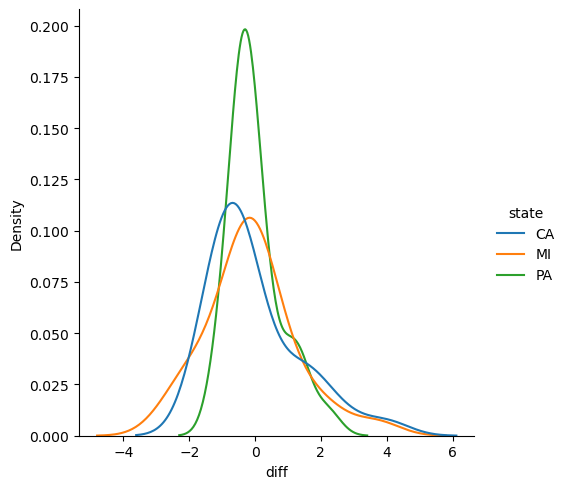

In [75]:
# - Q3. What is the distribution of unemployment changes for all states (separately)?

# displot can overlay info several ways: col, row, hue(color)
# overlaying histos - hard to read! (so lets use kde)
sns.displot(data=year_state_tall,x='diff', 
            hue='state', kind='kde')

<Axes: xlabel='diff', ylabel='state'>

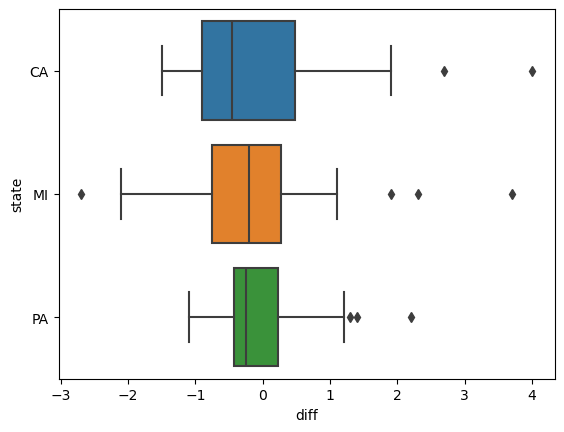

In [76]:
sns.boxplot(data=year_state_tall,x='diff', 
            y='state')

In [79]:
year_state_tall['INCGROWTH'] = year_state_tall['MedIncome'].pct_change()

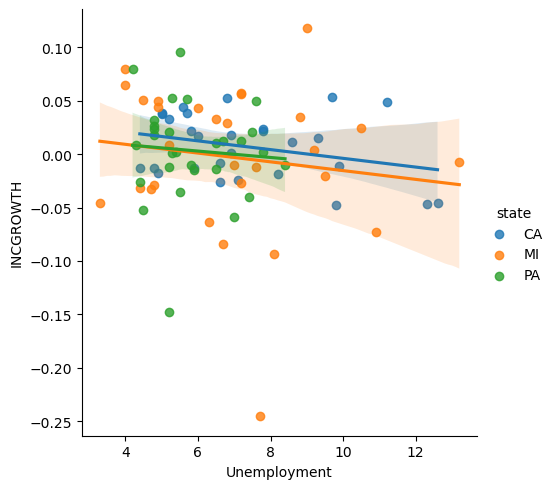

In [81]:
# - Q4. How does unemployment changes vary with median income growth?

# scatter = good, scatter + line=hot
sns.lmplot(data=year_state_tall,
           x='Unemployment',
           y='INCGROWTH', hue='state')

In [ ]:
# From the `ccm` data:

# - Q5. Plot the distribution of R&D (`xrd_a`). Bonuses:
#     - deal with outliers
#     - add a title
#     - change the x and y axis titles

C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(0.0, 0.15)

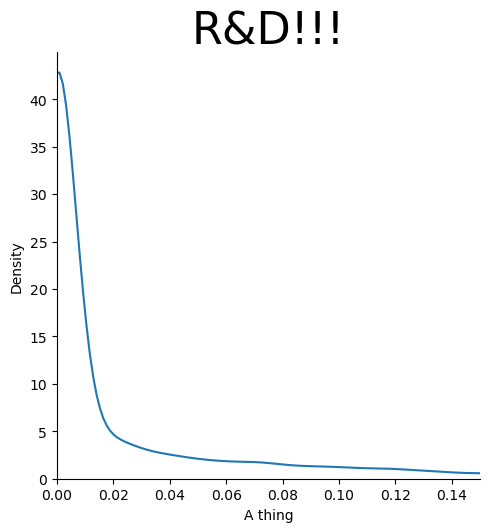

In [90]:
small = ccm.sample(10000) # smaller, for speed durnig class 

# tip: query can be used to remove outliers for plot
sns.displot(data=small.query( ' xrd_a >= 0 & xrd_a < .2  '  ),
            x='xrd_a', kind='kde').set(  
    # OPT A: can modify titles via .set() after sns function 
    xlabel='A thing', ) 

# OPT B: can modify titles via plt.___
# includes more options to modify text 
plt.title("R&D!!!", fontsize=32)

plt.xlim(0, 0.15) # or another way to avoid the outliers: zoom in after the fact! 

In [ ]:
# - Q6: Compare R&D and CAPX. Bonuses:
#     - don't plot outliers
#     - avoid oversaturated plot

# tips: query or plt.xlim for outlier 
# tips: avoid oversaturation via
    # sample
    # alpha
    # hex 

# another useful 2 way funct: jointplot (below, allows hex), binscatter (not in sns)

C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DonsLaptop\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


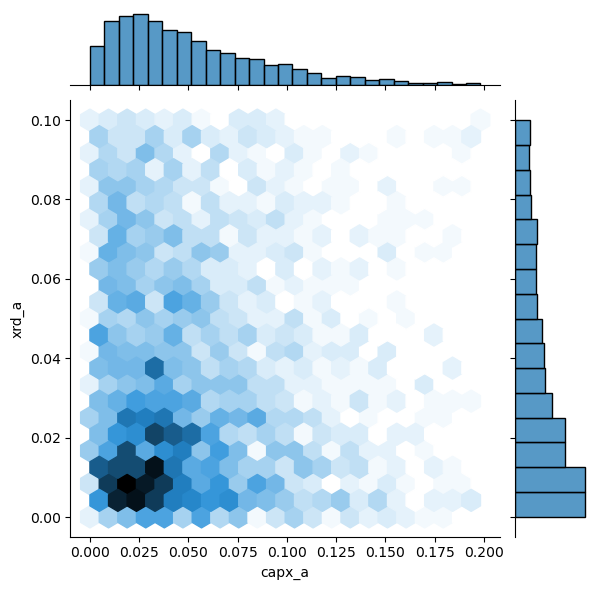

In [100]:
# using xlim to zoom in actually makes this plot look awful!
# so we query
# xrd usually = 0, so I use xrd_a > 0 to not plot those
# this plot thus shows the distrubution for firms doign both capx and r&d (interesting)
sns.jointplot(data=small.query( 'xrd_a < .1 & xrd_a > 0 & capx_a < .2'  ) ,
           kind='hex',
           x='capx_a',y='xrd_a')

